# 10.10 Applied Exercises

In [1]:
! pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_c

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import train_test_split, GridSearchCV
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset


In [3]:
! pip install torchinfo
from torchinfo import summary
from sklearn.linear_model import LogisticRegression
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
from ISLP.torch import SimpleDataModule, SimpleModule, ErrorTracker, rec_num_workers

In [4]:
from glob import glob
import json
from torchvision.datasets import MNIST, CIFAR100
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.transforms import Resize, Normalize, CenterCrop, ToTensor
from torchvision.io import read_image

## Question - 6. Consider the simple function $R(β) = sin(β) + β/10$.

### (a) Draw a graph of this function over the range $β ∈ [−6, 6]$.

Text(0.5, 1.0, 'Graph of R(Beta)')

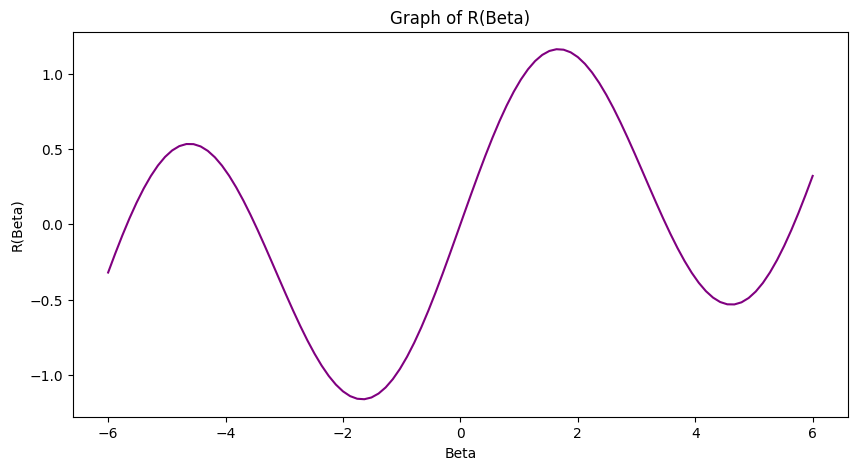

In [ ]:
plt.figure(figsize = (10,5))
beta = np.linspace(-6,6,100)
plt.plot(beta, np.sin(beta) + beta/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)')
plt.title('Graph of R(Beta)')


### (b) What is the derivative of this function?

Text(0.5, 1.0, 'Graph of R(Beta)`')

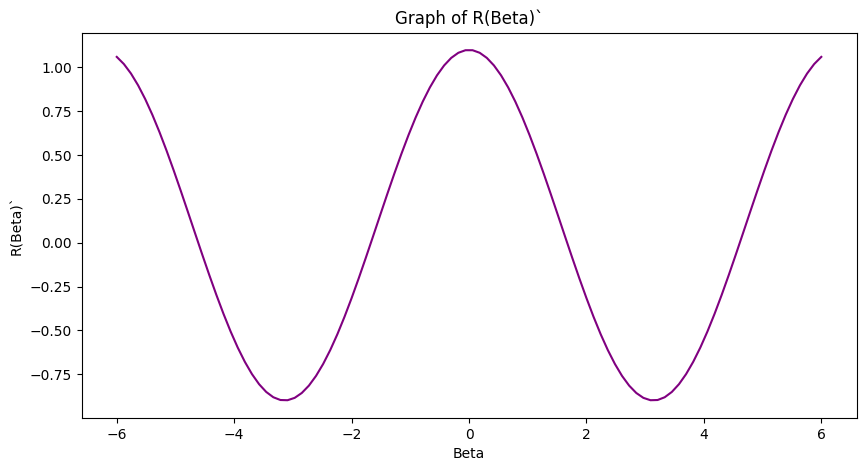

In [ ]:
derv = np.cos(beta) + 1/10
plt.figure(figsize = (10,5))
beta = np.linspace(-6, 6, 100)
plt.plot(beta, np.cos(beta) + 1/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)`')
plt.title('Graph of R(Beta)`')

### (c) Given $β0 = 2.3$, run gradient descent to find a local minimum of $R(β)$ using a learning rate of $ρ = 0.1$. Show each of $β0, β1,...$ in your plot, as well as the final answer.

In [ ]:
from sklearn.linear_model import SGDRegressor
beta = np.linspace(2.3, 6, 100)
sgd = SGDRegressor(learning_rate = 'constant', eta0 = 0.1, fit_intercept= False)
sgd.fit(beta.reshape(-1,1), np.sin(beta) + beta/10)

SGDRegressor(eta0=0.1, fit_intercept=False, learning_rate='constant')

In [ ]:
sgd.coef_


array([0.34792677])

Text(0.5, 1.0, 'Graph of R(Beta)`')

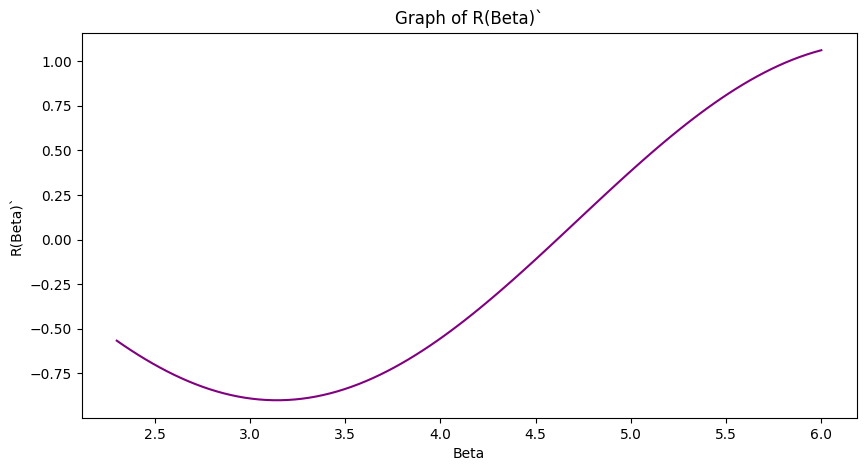

In [ ]:
plt.figure(figsize = (10,5))
beta = np.linspace(2.3, 6, 100)
plt.plot(beta, np.cos(beta) + 1/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)`')
plt.title('Graph of R(Beta)`')

In [ ]:
def derivative(arr):
    output= np.cos(arr)+0.1
    return output

def gradient_descent(x_start,rate,max_iters = 10000,precision = 0.000001):
    abs_error=1
    cur_x = x_start
    iters=0
    x,y = [],[]
    while abs_error > precision and iters < max_iters:
        prev_x = cur_x
        x.append(cur_x)
        y.append(derivative(cur_x))
        cur_x = cur_x - rate * derivative(cur_x) #Grad descent
        abs_error = abs(cur_x - prev_x) #Change in x
        iters = iters+1 #iteration count


    print("The local minimum occurs at", cur_x)
    plt.figure(figsize = (10,5))
    plt.plot(x,y, color = 'purple')
    plt.xlabel('Beta value')
    plt.ylabel('Derivative(Beta)')
    plt.title('Beta vs Derivative(Beta)')
    return cur_x

The local minimum occurs at 4.612212584046047


4.612212584046047

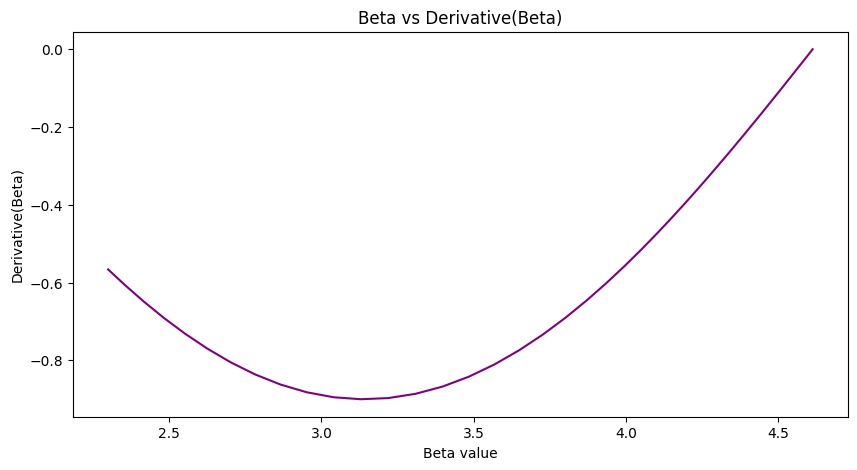

In [ ]:
gradient_descent(x_start=2.3,rate=0.1)

###(d) Repeat with β0 = 1.4.

In [ ]:
beta = np.linspace(1.4, 6, 100)
sgd = SGDRegressor(learning_rate = 'constant', eta0 = 0.1, fit_intercept= False)
sgd.fit(beta.reshape(-1,1),np.sin(beta) + beta/10)

SGDRegressor(eta0=0.1, fit_intercept=False, learning_rate='constant')

In [ ]:
sgd.coef_

array([0.69983437])

Text(0.5, 1.0, 'Graph of R(Beta)`')

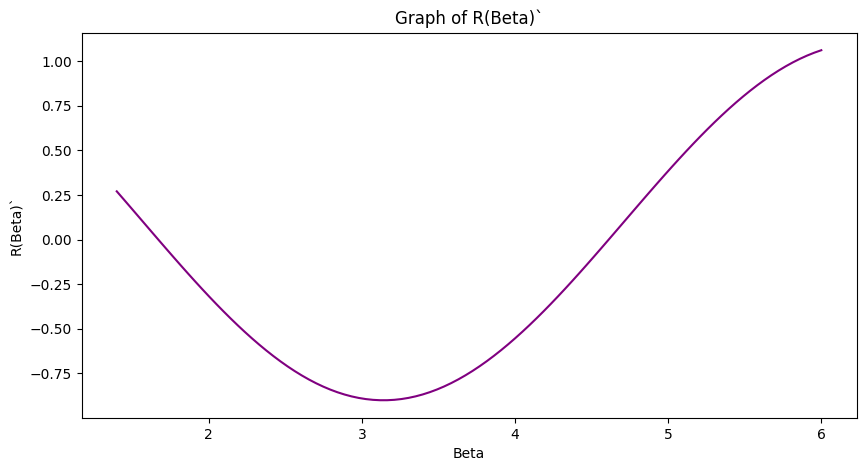

In [ ]:
plt.figure(figsize = (10,5))
beta = np.linspace(1.4, 6, 100)
plt.plot(beta, np.cos(beta) + 1/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)`')
plt.title('Graph of R(Beta)`')

The local minimum occurs at -1.670955163656141


-1.670955163656141

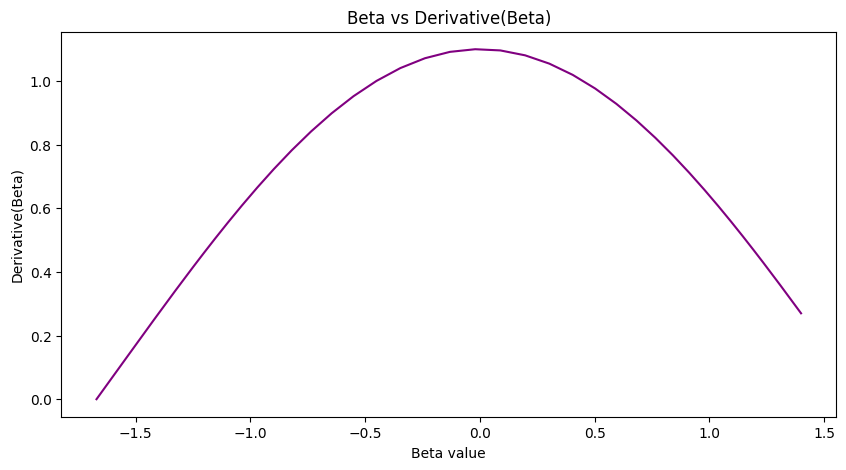

In [ ]:
gradient_descent(x_start=1.4,rate=0.1)

## 7. Fit a neural network to the Default data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1– 10.9.2 for guidance. Compare the classifcation performance of your model with that of linear logistic regression.

In [ ]:
Default = load_data('Default')

In [ ]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
Default.shape

(10000, 4)

In [ ]:
Default.dropna(inplace = True)

In [ ]:
Default.shape

(10000, 4)

In [ ]:
Default['default'] = Default['default'].map({'Yes': 1, 'No': 0})
Default['student'] = Default['student'].map({'Yes': 1, 'No': 0})
Default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
X = Default.drop('default', axis = 1).to_numpy()
y = Default['default'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =1)

In [ ]:
class defaultModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(defaultModel, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(hidden_size, output_size),
        nn.Sigmoid()
    )
  def forward(self, x):
    x = x.float()
    return self.layer1(x)



In [ ]:
defaultModel = defaultModel(3,10,2)

In [ ]:
X_train_t = torch.tensor(X_train, dtype = torch.long)
y_train_t = torch.tensor(y_train, dtype = torch.long)
X_test_t = torch.tensor(X_test, dtype = torch.long)
y_test_t = torch.tensor(y_test, dtype = torch.long)
test_dm = TensorDataset(X_test_t, y_test_t)
train_dm = TensorDataset(X_train_t, y_train_t)


In [ ]:
summary(defaultModel, input_size = X_train.shape, col_names = ['input_size', 'output_size', 'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
defaultModel                             [7500, 3]                 [7500, 2]                 --
├─Sequential: 1-1                        [7500, 3]                 [7500, 2]                 --
│    └─Linear: 2-1                       [7500, 3]                 [7500, 10]                40
│    └─ReLU: 2-2                         [7500, 10]                [7500, 10]                --
│    └─Dropout: 2-3                      [7500, 10]                [7500, 10]                --
│    └─Linear: 2-4                       [7500, 10]                [7500, 2]                 22
│    └─Sigmoid: 2-5                      [7500, 2]                 [7500, 2]                 --
Total params: 62
Trainable params: 62
Non-trainable params: 0
Total mult-adds (M): 0.47
Input size (MB): 0.09
Forward/backward pass size (MB): 0.72
Params size (MB): 0.00
Estimated Total Size (MB): 0.81

In [22]:

max_num_workers = rec_num_workers()

In [ ]:
default_dm = SimpleDataModule(train_dm, test_dm, batch_size = 32, num_workers = min(4,max_num_workers))

In [ ]:

default_module = SimpleModule.classification(defaultModel, num_classes = 2)
default_logger = CSVLogger('logs', name = 'default')

In [ ]:
default_trainer = Trainer(max_epochs = 20, logger = default_logger, deterministic = True, log_every_n_steps =5, callbacks = [ErrorTracker()])
default_trainer.fit(default_module, default_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | defaultModel     | 62     | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
62        Trainable params
0         Non-trainable params
62        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:105: Total length of `DataLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [ ]:
default_trainer.test(default_module, datamodule = default_dm)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9684000015258789     │
│         test_loss         │    0.6931472420692444     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6931472420692444, 'test_accuracy': 0.9684000015258789}]

In [ ]:

logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9684

### Results - 7. They are almost exactly the same in terms of test error!

## 8. From your collection of personal photographs, pick 10 images of animals (such as dogs, cats, birds, farm animals, etc.). If the subject does not occupy a reasonable part of the image, then crop the image. Now use a pretrained image classifcation CNN as in Lab 10.9.4 to predict the class of each of your images, and report the probabilities for the top five predicted classes for each image.

In [ ]:

resize = Resize((232,232))
crop = CenterCrop(224)
normalize = Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
imgfiles = sorted([f for f in glob('ML/*')])
print(imgfiles)
imgs = torch.stack([torch.div(crop(resize(read_image(f))), 255) for f in imgfiles])
imgs = normalize(imgs)
imgs.size()

['ML/dog1.jfif', 'ML/dog2.jfif', 'ML/dog3.jfif', 'ML/donkey.jfif', 'ML/turkey1.jfif', 'ML/turkey2.jfif', 'ML/turkey3.jfif', 'ML/zebra2.jfif', 'ML/zebra3.jfif']


torch.Size([9, 3, 224, 224])

In [ ]:
resnet_model = resnet50(weights = ResNet50_Weights.DEFAULT)
summary(resnet_model, input_data = imgs, col_names = ['input_size', 'output_size', 'num_params'])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 70.7MB/s]


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
ResNet                                   [9, 3, 224, 224]          [9, 1000]                 --
├─Conv2d: 1-1                            [9, 3, 224, 224]          [9, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [9, 64, 112, 112]         [9, 64, 112, 112]         128
├─ReLU: 1-3                              [9, 64, 112, 112]         [9, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [9, 64, 112, 112]         [9, 64, 56, 56]           --
├─Sequential: 1-5                        [9, 64, 56, 56]           [9, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [9, 64, 56, 56]           [9, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [9, 64, 56, 56]           [9, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [9, 64, 56, 56]           [9, 64, 56, 56]           128
│    │    └─ReLU: 3-3      

In [ ]:
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
imgs_pred = resnet_model(imgs)

In [ ]:
img_probs = np.exp(np.asarray(imgs_pred.detach()))
img_probs /= img_probs.sum(1)[:,None]

In [ ]:
img_probs

array([[0.00031183, 0.00038422, 0.0004077 , ..., 0.00034653, 0.00040337,
        0.00052821],
       [0.00060995, 0.00063688, 0.00059635, ..., 0.00049254, 0.00047571,
        0.00089904],
       [0.00061709, 0.00060595, 0.00048136, ..., 0.00049138, 0.00053168,
        0.00079309],
       ...,
       [0.00058076, 0.00028934, 0.00035617, ..., 0.00015288, 0.00063047,
        0.00028023],
       [0.00044563, 0.00045767, 0.00050659, ..., 0.00030619, 0.00036511,
        0.00046923],
       [0.00057123, 0.00066431, 0.00089763, ..., 0.00039041, 0.00070962,
        0.0006225 ]], dtype=float32)

## 9. Fit a lag-5 autoregressive model to the NYSE data, as described in the text and Lab 10.9.6. Reft the model with a 12-level factor representing the month. Does this factor improve the performance of the model?

In [6]:
NYSE = load_data('NYSE')
NYSE.head()

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True


In [7]:
cols = ['DJ_return', 'log_volume', 'log_volatility']
X = pd.DataFrame(StandardScaler(with_mean = True, with_std = True).fit_transform(NYSE[cols]), columns = NYSE[cols].columns, index = NYSE.index)
X

,DJ_return,log_volume,log_volatility
date,,,
1962-12-03,-0.549823,0.175075,-4.357078
1962-12-04,0.905200,1.517291,-2.529058
1962-12-05,0.434813,2.283789,-2.418037
1962-12-06,-0.431397,0.935176,-2.366521
1962-12-07,0.046340,0.224779,-2.500970
...,...,...,...
1986-12-24,0.751210,-0.974763,0.046886
1986-12-26,0.195352,-5.623814,-0.083983
1986-12-29,-1.148951,-1.553082,0.019967


In [8]:
X.index.unique()

Index(['1962-12-03', '1962-12-04', '1962-12-05', '1962-12-06', '1962-12-07',
       '1962-12-10', '1962-12-11', '1962-12-12', '1962-12-13', '1962-12-14',
       ...
       '1986-12-17', '1986-12-18', '1986-12-19', '1986-12-22', '1986-12-23',
       '1986-12-24', '1986-12-26', '1986-12-29', '1986-12-30', '1986-12-31'],
      dtype='object', name='date', length=6051)

In [9]:
for lag in range(1,6):
  for col in cols:
    newcol = np.zeros(X.shape[0])
    newcol[lag:] = X[col].values[:-lag]
    X.insert(len(X.columns), "{0}_{1}".format(col, lag), newcol)
X.insert(len(X.columns), 'train', NYSE['train'])
X.dropna(inplace = True)
X

,DJ_return,log_volume,log_volatility,DJ_return_1,log_volume_1,log_volatility_1,DJ_return_2,log_volume_2,log_volatility_2,DJ_return_3,log_volume_3,log_volatility_3,DJ_return_4,log_volume_4,log_volatility_4,DJ_return_5,log_volume_5,log_volatility_5,train
date,,,,,,,,,,,,,,,,,,,
1962-12-03,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-04,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-05,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-06,-0.431397,0.935176,-2.366521,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-07,0.046340,0.224779,-2.500970,-0.431397,0.935176,-2.366521,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,-0.360744,0.143003,0.252350,-1.118959,-0.149916,0.375045,False
1986-12-26,0.195352,-5.623814,-0.083983,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,-0.360744,0.143003,0.252350,False
1986-12-29,-1.148951,-1.553082,0.019967,0.195352,-5.623814,-0.083983,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,False


In [10]:
X

,DJ_return,log_volume,log_volatility,DJ_return_1,log_volume_1,log_volatility_1,DJ_return_2,log_volume_2,log_volatility_2,DJ_return_3,log_volume_3,log_volatility_3,DJ_return_4,log_volume_4,log_volatility_4,DJ_return_5,log_volume_5,log_volatility_5,train
date,,,,,,,,,,,,,,,,,,,
1962-12-03,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-04,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-05,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-06,-0.431397,0.935176,-2.366521,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
1962-12-07,0.046340,0.224779,-2.500970,-0.431397,0.935176,-2.366521,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,-0.360744,0.143003,0.252350,-1.118959,-0.149916,0.375045,False
1986-12-26,0.195352,-5.623814,-0.083983,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,-0.360744,0.143003,0.252350,False
1986-12-29,-1.148951,-1.553082,0.019967,0.195352,-5.623814,-0.083983,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,False


In [11]:
Y,train = X['log_volume'], X['train']
X = X.drop(columns = ['log_volume'] + cols)
X.columns

Index(['DJ_return_1', 'log_volume_1', 'log_volatility_1', 'DJ_return_2',
       'log_volume_2', 'log_volatility_2', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_4', 'log_volume_4', 'log_volatility_4',
       'DJ_return_5', 'log_volume_5', 'log_volatility_5', 'train'],
      dtype='object')

In [12]:
X = X.drop(columns = ['train'])
X


,DJ_return_1,log_volume_1,log_volatility_1,DJ_return_2,log_volume_2,log_volatility_2,DJ_return_3,log_volume_3,log_volatility_3,DJ_return_4,log_volume_4,log_volatility_4,DJ_return_5,log_volume_5,log_volatility_5
date,,,,,,,,,,,,,,,
1962-12-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-12-04,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-12-05,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-12-06,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-12-07,-0.431397,0.935176,-2.366521,0.434813,2.283789,-2.418037,0.905200,1.517291,-2.529058,-0.549823,0.175075,-4.357078,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,-0.360744,0.143003,0.252350,-1.118959,-0.149916,0.375045
1986-12-26,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406,-0.360744,0.143003,0.252350
1986-12-29,0.195352,-5.623814,-0.083983,0.751210,-0.974763,0.046886,-0.750046,1.964846,0.080250,-0.185178,1.602669,0.128004,0.968266,4.258402,0.263406


In [13]:
X.columns

Index(['DJ_return_1', 'log_volume_1', 'log_volatility_1', 'DJ_return_2',
       'log_volume_2', 'log_volatility_2', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_4', 'log_volume_4', 'log_volatility_4',
       'DJ_return_5', 'log_volume_5', 'log_volatility_5'],
      dtype='object')

In [14]:
ordered_cols = []
for lag in range(5,0,-1):
  for col in cols:
    ordered_cols.append('{0}_{1}'.format(col, lag))
X = X.reindex(columns=ordered_cols)
X.columns

Index(['DJ_return_5', 'log_volume_5', 'log_volatility_5', 'DJ_return_4',
       'log_volume_4', 'log_volatility_4', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_2', 'log_volume_2', 'log_volatility_2',
       'DJ_return_1', 'log_volume_1', 'log_volatility_1'],
      dtype='object')

In [15]:
X.head()

,DJ_return_5,log_volume_5,log_volatility_5,DJ_return_4,log_volume_4,log_volatility_4,DJ_return_3,log_volume_3,log_volatility_3,DJ_return_2,log_volume_2,log_volatility_2,DJ_return_1,log_volume_1,log_volatility_1
date,,,,,,,,,,,,,,,
1962-12-03,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-12-04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078
1962-12-05,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058
1962-12-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,0.434813,2.283789,-2.418037
1962-12-07,0.0,0.0,0.0,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,0.434813,2.283789,-2.418037,-0.431397,0.935176,-2.366521


In [16]:
X.shape

(6051, 15)

In [17]:
X_rnn = X.to_numpy().reshape(-1,5,3)
X_rnn.shape

(6051, 5, 3)

In [18]:
class NYSEModel(nn.Module):
  def __init__(self):
    super(NYSEModel, self).__init__()
    self.rnn = nn.RNN(3,12, batch_first = True)
    self.dense = nn.Linear(12,1)
    self.dropout = nn.Dropout(0.1)
  def forward(self, x):
    val, h_n = self.rnn(x)
    val = self.dense(self.dropout(val[:,-1]))
    return torch.flatten(val)
nyse_model = NYSEModel()



In [19]:
dataset = []
for mask in [train, ~train]:
  X_rnn_t = torch.tensor(X_rnn[mask].astype(np.float32))
  Y_t = torch.tensor(Y[mask].astype(np.float32))
  dataset.append(TensorDataset(X_rnn_t, Y_t))
nyse_train, nyse_test = dataset

<ipython-input-19-e12d33fa2ee4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))
<ipython-input-19-e12d33fa2ee4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))


In [20]:
summary(nyse_model, input_data = X_rnn_t, col_names = ['input_size', 'output_size', 'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
NYSEModel                                [1770, 5, 3]              [1770]                    --
├─RNN: 1-1                               [1770, 5, 3]              [1770, 5, 12]             204
├─Dropout: 1-2                           [1770, 12]                [1770, 12]                --
├─Linear: 1-3                            [1770, 12]                [1770, 1]                 13
Total params: 217
Trainable params: 217
Non-trainable params: 0
Total mult-adds (M): 1.83
Input size (MB): 0.11
Forward/backward pass size (MB): 0.86
Params size (MB): 0.00
Estimated Total Size (MB): 0.97

In [23]:
nyse_dm = SimpleDataModule(nyse_train, nyse_test, num_workers = min(4,max_num_workers), validation = nyse_test, batch_size = 64)

In [24]:
for idx, (x, y) in enumerate(nyse_dm.train_dataloader()):
  out = nyse_model(x)
  print(y.size(), out.size())
  if idx >= 2:break

torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])


In [26]:
from torchmetrics import MeanAbsoluteError, R2Score
nyse_optimizer = RMSprop(nyse_model.parameters(), lr = 0.001)
nyse_module = SimpleModule.regression(nyse_model, optimizer = nyse_optimizer, metrics = {'r2': R2Score()})

In [28]:
nyse_trainer = Trainer(max_epochs = 100, deterministic = True, callbacks = [ErrorTracker()])
nyse_trainer.fit(nyse_module, nyse_dm)
nyse_trainer.test(nyse_module, nyse_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | NYSEModel | 217    | train
1 | loss  | MSELoss   | 0      | train
--------------------------------------------
217       Trainable params
0         Non-trainable params
217       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6226011514663696     │
│          test_r2          │    0.40912115573883057    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6226011514663696, 'test_r2': 0.40912115573883057}]

In [29]:
X.head()

,DJ_return_5,log_volume_5,log_volatility_5,DJ_return_4,log_volume_4,log_volatility_4,DJ_return_3,log_volume_3,log_volatility_3,DJ_return_2,log_volume_2,log_volatility_2,DJ_return_1,log_volume_1,log_volatility_1
date,,,,,,,,,,,,,,,
1962-12-03,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-12-04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078
1962-12-05,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058
1962-12-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,0.434813,2.283789,-2.418037
1962-12-07,0.0,0.0,0.0,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,0.434813,2.283789,-2.418037,-0.431397,0.935176,-2.366521


In [30]:
X.index

Index(['1962-12-03', '1962-12-04', '1962-12-05', '1962-12-06', '1962-12-07',
       '1962-12-10', '1962-12-11', '1962-12-12', '1962-12-13', '1962-12-14',
       ...
       '1986-12-17', '1986-12-18', '1986-12-19', '1986-12-22', '1986-12-23',
       '1986-12-24', '1986-12-26', '1986-12-29', '1986-12-30', '1986-12-31'],
      dtype='object', name='date', length=6051)

In [33]:
X.index[100][5:7]

'04'

In [34]:
X.shape

(6051, 15)

In [36]:
col = np.zeros(X.shape[0])
for i in range(6051):
  if X.index[i][5:7] == '01': col[i] = 1
  elif X.index[i][5:7] == '02': col[i] = 2
  elif X.index[i][5:7] == '03': col[i] = 3
  elif X.index[i][5:7] == '04': col[i] = 4
  elif X.index[i][5:7] == '05': col[i] = 5
  elif X.index[i][5:7] == '06': col[i] = 6
  elif X.index[i][5:7] == '07': col[i] = 7
  elif X.index[i][5:7] == '08': col[i] = 8
  elif X.index[i][5:7] == '09': col[i] = 9
  elif X.index[i][5:7] == '10': col[i] = 10
  elif X.index[i][5:7] == '11': col[i] = 11
  elif X.index[i][5:7] == '12': col[i] = 12
  else: col[i] = 0
X.insert(len(X.columns), 'month', col)


In [37]:
X.head()

,DJ_return_5,log_volume_5,log_volatility_5,DJ_return_4,log_volume_4,log_volatility_4,DJ_return_3,log_volume_3,log_volatility_3,DJ_return_2,log_volume_2,log_volatility_2,DJ_return_1,log_volume_1,log_volatility_1,month
date,,,,,,,,,,,,,,,,
1962-12-03,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.0
1962-12-04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,12.0
1962-12-05,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,12.0
1962-12-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,0.434813,2.283789,-2.418037,12.0
1962-12-07,0.0,0.0,0.0,-0.549823,0.175075,-4.357078,0.905200,1.517291,-2.529058,0.434813,2.283789,-2.418037,-0.431397,0.935176,-2.366521,12.0


In [40]:
X['month'].unique()

array([12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [41]:
dataset = []
for mask in [train, ~train]:
  X_month_t = torch.tensor(X['month'][mask].astype(np.float32))
  Y_t = torch.tensor(Y[mask].astype(np.float32))
  dataset.append(TensorDataset(X_month_t, Y_t))
month_train, month_test = dataset

<ipython-input-41-4b528f408f3f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_month_t = torch.tensor(X['month'][mask].astype(np.float32))
<ipython-input-41-4b528f408f3f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))
<ipython-input-41-4b528f408f3f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_month_t = torch.tensor(X['month'][mask].astype(np.float32))
<ipython-input-41-4b52

In [48]:
month_dm = SimpleDataModule(month_train, month_test, num_workers=min(4, max_num_workers), validation=month_test, batch_size=64)

In [77]:
class NonLinearARModel(nn.Module):
  def __init__(self):
    super(NonLinearARModel , self).__init__()
    self._forward = nn.Sequential(nn.Linear(1, 32), nn.ReLU(), nn.Dropout(0.5), nn.Linear(32, 1))
  def forward(self, x):
    x = x.unsqueeze(1)
    return self._forward(x).squeeze()

In [78]:
nl_model = NonLinearARModel()
nl_optimizer = RMSprop(nl_model.parameters(), lr = 0.001)
nl_module = SimpleModule.regression(nl_model, optimizer = nl_optimizer, metrics = {'r2': R2Score()})

In [79]:
nl_trainer = Trainer(max_epochs = 100, deterministic = True, callbacks = [ErrorTracker()])
nl_trainer.fit(nl_module, month_dm)
nl_trainer.test(nl_module, month_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | NonLinearARModel | 97     | train
1 | loss  | MSELoss          | 0      | train
---------------------------------------------------
97        Trainable params
0         Non-trainable params
97        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0207346677780151     │
│          test_r2          │   0.031272947788238525    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.0207346677780151, 'test_r2': 0.031272947788238525}]

In [80]:
# This is not a great model as it has higher test loss and a lower r squared value

## 10. In Section 10.9.6, we showed how to ft a linear AR model to the NYSE data using the LinearRegression() function. However, we also mentioned that we can “fatten” the short sequences produced for the RNN model in order to ft a linear AR model. Use this latter approach to ft a linear AR model to the NYSE data. Compare the test R2 of this linear AR model to that of the linear AR model that we ft in the lab. What are the advantages/disadvantages of each approach?